In [ ]:
# Explain a CNN model's predictions using Grad-CAM in PyTorch
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Load a pre-trained ResNet model
model = models.resnet18(pretrained=True)
model.eval()

# Define variables to capture gradients and activations
gradients = None
activations = None

# Define hooks to capture gradients and activations
def save_gradients(module, grad_in, grad_out):
    global gradients
    gradients = grad_out[0]

def save_activations(module, input, output):
    global activations
    activations = output

# Attach hooks to the target layer
target_layer = model.layer4[1].conv2
target_layer.register_backward_hook(save_gradients)
target_layer.register_forward_hook(save_activations)

In [ ]:
# Fetch a sample image from torchvision datasets
dataset = datasets.FakeData(transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
]))
image, _ = dataset[0]  # Get the first image
image = transforms.ToPILImage()(image)  # Convert to PIL for visualization

# Preprocess the image for the model
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image).unsqueeze(0)

# TODO: Perform a forward pass
output = ...
predicted_class = ...

# TODO: Perform a backward pass for the predicted class
model.zero_grad()
...

In [ ]:
# Generate Grad-CAM heatmap
weights = ...
heatmap = ...

# Normalize the heatmap and overlay it on the original image
heatmap = heatmap / heatmap.max()
heatmap = transforms.ToPILImage()(heatmap.cpu())
heatmap = heatmap.resize(image.size, resample=Image.BILINEAR)

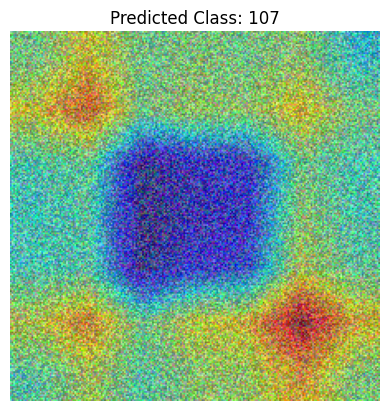

In [3]:
# Display the image with the Grad-CAM heatmap
plt.imshow(image)
plt.imshow(heatmap, alpha=0.5, cmap='jet')
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()
